In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\RUCHITA ANGRE\Desktop\Project msc cs 2\project data.csv")

In [3]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Did you find good quality of product online as compare to your Retailer Shop?,Do you find enough Quantity of grocery product online in comparison to your Retailer ?,Are online products cheaper in price as compared to your Retailer Shop?,"Did you find product online easily ,compare to your Retailer Shop?",Do you find any difficulties in online payment ?,Are you satisfied with the product you received as compared to your Retailer Shop?,"On scale of 5 , can you rate for following factor ? [On Time Delivery]","On scale of 5 , can you rate for following factor ? [Trustworthy]","On scale of 5 , can you rate for following factor ? [No transaction issues]","On scale of 5 , can you rate for following factor ? [Security]","On scale of 5 , can you rate for following factor ? [Product Description]","On scale of 5 , can you rate for following factor ? [Product Reviews]",Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would you prefer shopping grocery online than shopping from your Retailer Shop?,"Overall, How would you rate your Online Grocery Shopping Experience"
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,5,5,5,5,5,4,Yes,Everyday,Yes,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,Yes,Variety of Product,Yes,Yes,Yes,Yes,No,No,1,2,2,2,2,2,Yes,Everyday,Yes,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,Yes,Yes,2,2,2,2,2,2,Yes,Everyday,Yes,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,Yes,Yes,5,5,5,5,5,5,Yes,Everyday,Yes,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,Yes,Variety of Product,No,Yes,Yes,Yes,No,Yes,2,2,1,2,2,1,Yes,Weekly,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,No,Discount & Offers;Convenient;Shop at any time,No,No,No,No,Yes,No,1,1,1,1,3,2,Yes,Weekly,No,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,5,5,4,5,3,3,Yes,Weekly,Yes,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,4,4,5,5,5,4,Yes,Weekly,Yes,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,No,Variety of Product;Shop at any time,No,No,No,No,Yes,No,3,1,1,1,1,1,Yes,Weekly,No,1


In [4]:
data.columns

Index(['Timestamp', 'Have you ever shopped Online?',
       'If Yes, Do you find Online Grocery Shopping Easier ?',
       'Why do you  Shop Online?  ',
       'Did you find good quality of product online as compare to your Retailer Shop?',
       'Do you find enough  Quantity of grocery product  online in comparison to your Retailer ? ',
       'Are online  products cheaper in price as compared to your Retailer Shop? ',
       'Did you find product online easily ,compare to  your Retailer Shop? ',
       'Do you find any difficulties in online payment ?',
       'Are you satisfied with the product  you received as compared to your  Retailer Shop? ',
       'On scale of 5 , can you rate for following factor ? [On Time Delivery]',
       'On scale of 5 , can you rate for following factor ? [Trustworthy]',
       'On scale of 5 , can you rate for following factor ? [No transaction issues]',
       'On scale of 5 , can you rate for following factor ? [Security]',
       'On scale of 5 , c

In [5]:
data.rename(columns = {'Did you find good quality of product online as compare to your Retailer Shop?':'Quality','Do you find enough  Quantity of grocery product  online in comparison to your Retailer ? ':'Quantity','Are online  products cheaper in price as compared to your Retailer Shop? ':'Cheaper in price', 'Did you find product online easily ,compare to  your Retailer Shop? ':'Found Product Online Easily','Do you find any difficulties in online payment ?':'Difficulties in Online Payments','Are you satisfied with the product  you received as compared to your  Retailer Shop? ':'Satisfaction',
                      'On scale of 5 , can you rate for following factor ? [On Time Delivery]':'On Time Delivery',
                        'On scale of 5 , can you rate for following factor ? [Trustworthy]':'Trustworthy',
       'On scale of 5 , can you rate for following factor ? [No transaction issues]':'No transaction issues',
       'On scale of 5 , can you rate for following factor ? [Security]':'Security',
       'On scale of 5 , can you rate for following factor ? [Product  Description]':'Product  Description',
       'On scale of 5 , can you rate for following factor ? [Product Reviews]':'Product Reviews', 'Overall, How would you rate your Online Grocery Shopping Experience':'Overall Experience','Would you prefer  shopping grocery online  than shopping  from your Retailer Shop?  ':'Would You Prefer'}, inplace = True)


In [16]:
data.columns

Index(['Timestamp', 'Have you ever shopped Online?',
       'If Yes, Do you find Online Grocery Shopping Easier ?',
       'Why do you  Shop Online?  ', 'Quality', 'Quantity', 'Cheaper in price',
       'Found Product Online Easily', 'Difficulties in Online Payments',
       'Satisfaction', 'On Time Delivery', 'Trustworthy',
       'No transaction issues', 'Security', 'Product  Description',
       'Product Reviews',
       'Has  COVID-19   increased time you spent online  grocery Shopping    ? ',
       'How often do you shop online in last six month?', 'Would You Prefer',
       'Overall Experience'],
      dtype='object')

In [6]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would You Prefer,Overall Experience
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,5,5,5,5,5,4,Yes,Everyday,Yes,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,Yes,Variety of Product,Yes,Yes,Yes,Yes,No,No,1,2,2,2,2,2,Yes,Everyday,Yes,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,Yes,Yes,2,2,2,2,2,2,Yes,Everyday,Yes,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,Yes,Yes,5,5,5,5,5,5,Yes,Everyday,Yes,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,Yes,Variety of Product,No,Yes,Yes,Yes,No,Yes,2,2,1,2,2,1,Yes,Weekly,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,No,Discount & Offers;Convenient;Shop at any time,No,No,No,No,Yes,No,1,1,1,1,3,2,Yes,Weekly,No,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,5,5,4,5,3,3,Yes,Weekly,Yes,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,4,4,5,5,5,4,Yes,Weekly,Yes,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,No,Variety of Product;Shop at any time,No,No,No,No,Yes,No,3,1,1,1,1,1,Yes,Weekly,No,1


In [7]:
def trans_con(x):
    if x == 'Yes':
        return 1
    if x == 'No':
        return 0

In [8]:
data['If Yes, Do you find Online Grocery Shopping Easier ?'] = data['If Yes, Do you find Online Grocery Shopping Easier ?'].apply(trans_con)

In [9]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would You Prefer,Overall Experience
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,1,All of above,Yes,Yes,Yes,Yes,No,Yes,5,5,5,5,5,4,Yes,Everyday,Yes,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,1,Variety of Product,Yes,Yes,Yes,Yes,No,No,1,2,2,2,2,2,Yes,Everyday,Yes,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,1,All of above,Yes,Yes,Yes,Yes,Yes,Yes,2,2,2,2,2,2,Yes,Everyday,Yes,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,1,All of above,Yes,Yes,Yes,Yes,Yes,Yes,5,5,5,5,5,5,Yes,Everyday,Yes,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,1,Variety of Product,No,Yes,Yes,Yes,No,Yes,2,2,1,2,2,1,Yes,Weekly,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,0,Discount & Offers;Convenient;Shop at any time,No,No,No,No,Yes,No,1,1,1,1,3,2,Yes,Weekly,No,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,1,All of above,Yes,Yes,Yes,Yes,No,Yes,5,5,4,5,3,3,Yes,Weekly,Yes,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,1,All of above,Yes,Yes,Yes,Yes,No,Yes,4,4,5,5,5,4,Yes,Weekly,Yes,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,0,Variety of Product;Shop at any time,No,No,No,No,Yes,No,3,1,1,1,1,1,Yes,Weekly,No,1


In [10]:
data['Quality'] = data['Quality'].apply(trans_con)
data['Quantity'] = data['Quantity'].apply(trans_con)

In [11]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would You Prefer,Overall Experience
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,1,All of above,1,1,Yes,Yes,No,Yes,5,5,5,5,5,4,Yes,Everyday,Yes,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,1,Variety of Product,1,1,Yes,Yes,No,No,1,2,2,2,2,2,Yes,Everyday,Yes,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,1,All of above,1,1,Yes,Yes,Yes,Yes,2,2,2,2,2,2,Yes,Everyday,Yes,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,1,All of above,1,1,Yes,Yes,Yes,Yes,5,5,5,5,5,5,Yes,Everyday,Yes,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,1,Variety of Product,0,1,Yes,Yes,No,Yes,2,2,1,2,2,1,Yes,Weekly,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,0,Discount & Offers;Convenient;Shop at any time,0,0,No,No,Yes,No,1,1,1,1,3,2,Yes,Weekly,No,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,1,All of above,1,1,Yes,Yes,No,Yes,5,5,4,5,3,3,Yes,Weekly,Yes,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,1,All of above,1,1,Yes,Yes,No,Yes,4,4,5,5,5,4,Yes,Weekly,Yes,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,0,Variety of Product;Shop at any time,0,0,No,No,Yes,No,3,1,1,1,1,1,Yes,Weekly,No,1


In [12]:
data['Cheaper in price'] = data['Cheaper in price'].apply(trans_con)
data['Found Product Online Easily'] = data['Found Product Online Easily'].apply(trans_con)

In [13]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would You Prefer,Overall Experience
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,1,All of above,1,1,1,1,No,Yes,5,5,5,5,5,4,Yes,Everyday,Yes,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,1,Variety of Product,1,1,1,1,No,No,1,2,2,2,2,2,Yes,Everyday,Yes,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,1,All of above,1,1,1,1,Yes,Yes,2,2,2,2,2,2,Yes,Everyday,Yes,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,1,All of above,1,1,1,1,Yes,Yes,5,5,5,5,5,5,Yes,Everyday,Yes,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,1,Variety of Product,0,1,1,1,No,Yes,2,2,1,2,2,1,Yes,Weekly,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,0,Discount & Offers;Convenient;Shop at any time,0,0,0,0,Yes,No,1,1,1,1,3,2,Yes,Weekly,No,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,1,All of above,1,1,1,1,No,Yes,5,5,4,5,3,3,Yes,Weekly,Yes,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,1,All of above,1,1,1,1,No,Yes,4,4,5,5,5,4,Yes,Weekly,Yes,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,0,Variety of Product;Shop at any time,0,0,0,0,Yes,No,3,1,1,1,1,1,Yes,Weekly,No,1


In [14]:
data['Difficulties in Online Payments'] = data['Difficulties in Online Payments'].apply(trans_con)
data['Satisfaction'] = data['Satisfaction'].apply(trans_con)

In [15]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would You Prefer,Overall Experience
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,1,All of above,1,1,1,1,0,1,5,5,5,5,5,4,Yes,Everyday,Yes,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,1,Variety of Product,1,1,1,1,0,0,1,2,2,2,2,2,Yes,Everyday,Yes,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,1,All of above,1,1,1,1,1,1,2,2,2,2,2,2,Yes,Everyday,Yes,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,1,All of above,1,1,1,1,1,1,5,5,5,5,5,5,Yes,Everyday,Yes,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,1,Variety of Product,0,1,1,1,0,1,2,2,1,2,2,1,Yes,Weekly,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,0,Discount & Offers;Convenient;Shop at any time,0,0,0,0,1,0,1,1,1,1,3,2,Yes,Weekly,No,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,1,All of above,1,1,1,1,0,1,5,5,4,5,3,3,Yes,Weekly,Yes,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,1,All of above,1,1,1,1,0,1,4,4,5,5,5,4,Yes,Weekly,Yes,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,0,Variety of Product;Shop at any time,0,0,0,0,1,0,3,1,1,1,1,1,Yes,Weekly,No,1


In [17]:
data['Has  COVID-19   increased time you spent online  grocery Shopping    ? '] = data['Has  COVID-19   increased time you spent online  grocery Shopping    ? '].apply(trans_con)
data[ 'Would You Prefer'] = data[ 'Would You Prefer'].apply(trans_con)

In [18]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would You Prefer,Overall Experience
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,1,All of above,1,1,1,1,0,1,5,5,5,5,5,4,1,Everyday,1,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,1,Variety of Product,1,1,1,1,0,0,1,2,2,2,2,2,1,Everyday,1,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,1,All of above,1,1,1,1,1,1,2,2,2,2,2,2,1,Everyday,1,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,1,All of above,1,1,1,1,1,1,5,5,5,5,5,5,1,Everyday,1,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,1,Variety of Product,0,1,1,1,0,1,2,2,1,2,2,1,1,Weekly,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,0,Discount & Offers;Convenient;Shop at any time,0,0,0,0,1,0,1,1,1,1,3,2,1,Weekly,0,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,1,All of above,1,1,1,1,0,1,5,5,4,5,3,3,1,Weekly,1,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,1,All of above,1,1,1,1,0,1,4,4,5,5,5,4,1,Weekly,1,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,0,Variety of Product;Shop at any time,0,0,0,0,1,0,3,1,1,1,1,1,1,Weekly,0,1


In [19]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

In [20]:
data['Why do you  Shop Online?  '] = number.fit_transform(data['Why do you  Shop Online?  '].astype('str'))

In [21]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would You Prefer,Overall Experience
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,1,0,1,1,1,1,0,1,5,5,5,5,5,4,1,Everyday,1,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,1,10,1,1,1,1,0,0,1,2,2,2,2,2,1,Everyday,1,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,1,0,1,1,1,1,1,1,2,2,2,2,2,2,1,Everyday,1,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,1,0,1,1,1,1,1,1,5,5,5,5,5,5,1,Everyday,1,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,1,10,0,1,1,1,0,1,2,2,1,2,2,1,1,Weekly,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,0,5,0,0,0,0,1,0,1,1,1,1,3,2,1,Weekly,0,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,1,0,1,1,1,1,0,1,5,5,4,5,3,3,1,Weekly,1,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,1,0,1,1,1,1,0,1,4,4,5,5,5,4,1,Weekly,1,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,0,19,0,0,0,0,1,0,3,1,1,1,1,1,1,Weekly,0,1


In [22]:
data['How often do you shop online in last six month?'] = number.fit_transform(data['How often do you shop online in last six month?'].astype('str'))

In [23]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would You Prefer,Overall Experience
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,1,0,1,1,1,1,0,1,5,5,5,5,5,4,1,1,1,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,1,10,1,1,1,1,0,0,1,2,2,2,2,2,1,1,1,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,1,0,1,1,1,1,1,1,2,2,2,2,2,2,1,1,1,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,1,0,1,1,1,1,1,1,5,5,5,5,5,5,1,1,1,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,1,10,0,1,1,1,0,1,2,2,1,2,2,1,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,0,5,0,0,0,0,1,0,1,1,1,1,3,2,1,3,0,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,1,0,1,1,1,1,0,1,5,5,4,5,3,3,1,3,1,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,1,0,1,1,1,1,0,1,4,4,5,5,5,4,1,3,1,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,0,19,0,0,0,0,1,0,3,1,1,1,1,1,1,3,0,1


In [28]:
data.columns

Index(['Timestamp', 'Have you ever shopped Online?',
       'If Yes, Do you find Online Grocery Shopping Easier ?',
       'Why do you  Shop Online?  ', 'Quality', 'Quantity', 'Cheaper in price',
       'Found Product Online Easily', 'Difficulties in Online Payments',
       'Satisfaction', 'On Time Delivery', 'Trustworthy',
       'No transaction issues', 'Security', 'Product  Description',
       'Product Reviews',
       'Has  COVID-19   increased time you spent online  grocery Shopping    ? ',
       'How often do you shop online in last six month?', 'Would You Prefer',
       'Overall Experience'],
      dtype='object')

In [24]:
train, test = train_test_split(data, test_size =0.25)

In [25]:
train.shape

(277, 20)

In [26]:
test.shape

(93, 20)

In [27]:
c1 = DecisionTreeClassifier(min_samples_split=100)
c2 = DecisionTreeClassifier(min_samples_split=10)

In [29]:
features = ['Quality', 'Quantity', 'Cheaper in price','Satisfaction', 'Has  COVID-19   increased time you spent online  grocery Shopping    ? ',
       'How often do you shop online in last six month?', 'Overall Experience'] 

In [30]:
X_train = train[features]
y_train = train['Would You Prefer']

X_test = test[features]
y_test = test['Would You Prefer']

In [31]:
tree1 = c1.fit(X_train, y_train)
tree2 = c2.fit(X_train, y_train)

In [32]:
y_pred_t1 = c1.predict(X_train)
y_pred_t2 = c2.predict(X_train)

In [33]:
y_pred1 = c1.predict(X_test)
y_pred2 = c2.predict(X_test)

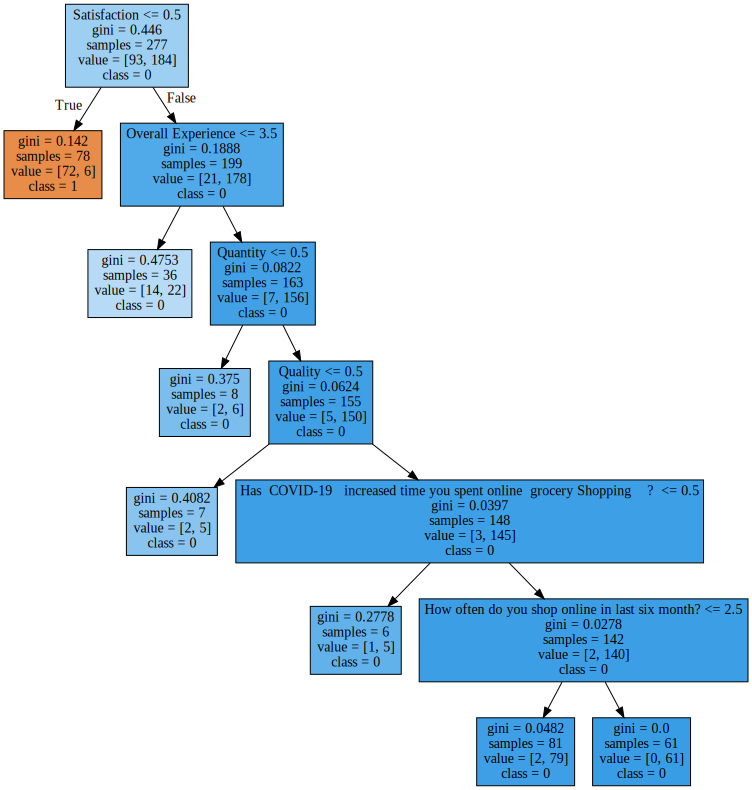

In [34]:
dot_data = tree.export_graphviz(tree1,feature_names = X_train.columns,class_names=["1","0"], filled=True, precision=4)
graph = graphviz.Source(dot_data, format="png") 
graph

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
train_score_1 = accuracy_score(y_train, y_pred_t1)*100
train_score_1

90.25270758122743

In [37]:
train_score_2 = accuracy_score(y_train, y_pred_t2)*100
train_score_2

93.14079422382672

In [38]:
test_score_1 = accuracy_score(y_test, y_pred1)*100
test_score_1

87.09677419354838

In [39]:
test_score_2 = accuracy_score(y_test, y_pred2)*100
test_score_2

90.32258064516128

In [40]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.70      0.81        37
           1       0.83      0.98      0.90        56

    accuracy                           0.87        93
   macro avg       0.90      0.84      0.86        93
weighted avg       0.88      0.87      0.87        93



In [41]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87        37
           1       0.90      0.95      0.92        56

    accuracy                           0.90        93
   macro avg       0.91      0.89      0.90        93
weighted avg       0.90      0.90      0.90        93



In [42]:
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[26, 11],
       [ 1, 55]], dtype=int64)

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score,precision_score

In [44]:
model1 = tree1.predict_proba(X_train)
model1

array([[0.        , 1.        ],
       [0.16666667, 0.83333333],
       [0.38888889, 0.61111111],
       [0.02469136, 0.97530864],
       [0.02469136, 0.97530864],
       [0.92307692, 0.07692308],
       [0.38888889, 0.61111111],
       [0.        , 1.        ],
       [0.16666667, 0.83333333],
       [0.92307692, 0.07692308],
       [0.92307692, 0.07692308],
       [0.92307692, 0.07692308],
       [0.        , 1.        ],
       [0.92307692, 0.07692308],
       [0.92307692, 0.07692308],
       [0.02469136, 0.97530864],
       [0.38888889, 0.61111111],
       [0.16666667, 0.83333333],
       [0.92307692, 0.07692308],
       [0.02469136, 0.97530864],
       [0.92307692, 0.07692308],
       [0.25      , 0.75      ],
       [0.38888889, 0.61111111],
       [0.        , 1.        ],
       [0.92307692, 0.07692308],
       [0.02469136, 0.97530864],
       [0.38888889, 0.61111111],
       [0.38888889, 0.61111111],
       [0.28571429, 0.71428571],
       [0.02469136, 0.97530864],
       [0.

In [45]:
model2 = tree2.predict_proba(X_train)
model2

array([[0.        , 1.        ],
       [0.16666667, 0.83333333],
       [0.57142857, 0.42857143],
       [0.04545455, 0.95454545],
       [0.        , 1.        ],
       [0.83333333, 0.16666667],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.16666667, 0.83333333],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.04545455, 0.95454545],
       [0.33333333, 0.66666667],
       [0.16666667, 0.83333333],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.07142857, 0.92857143],
       [0.33333333, 0.66666667],
       [0.71428571, 0.28571429],
       [0.28571429, 0.71428571],
       [0.04545455, 0.95454545],
       [0.

In [46]:
model1_test = tree1.predict_proba(X_test)
model1_test

array([[0.92307692, 0.07692308],
       [0.92307692, 0.07692308],
       [0.92307692, 0.07692308],
       [0.92307692, 0.07692308],
       [0.92307692, 0.07692308],
       [0.92307692, 0.07692308],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.02469136, 0.97530864],
       [0.02469136, 0.97530864],
       [0.92307692, 0.07692308],
       [0.        , 1.        ],
       [0.92307692, 0.07692308],
       [0.        , 1.        ],
       [0.38888889, 0.61111111],
       [0.92307692, 0.07692308],
       [0.92307692, 0.07692308],
       [0.02469136, 0.97530864],
       [0.92307692, 0.07692308],
       [0.92307692, 0.07692308],
       [0.38888889, 0.61111111],
       [0.92307692, 0.07692308],
       [0.38888889, 0.61111111],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.02469136, 0.97530864],
       [0.02469136, 0.97530864],
       [0.02469136, 0.97530864],
       [0.        , 1.        ],
       [0.

In [47]:
model2_test = tree2.predict_proba(X_test)
model2_test

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.71428571, 0.28571429],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.07142857, 0.92857143],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.04545455, 0.95454545],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.

In [48]:
rf1 = RandomForestClassifier(max_depth=4, n_estimators = 20)
rf1.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=20)

In [49]:
rf1_model_pred = rf1.predict(X_test)

In [50]:
test_score_rf = accuracy_score(y_test, rf1_model_pred)*100
test_score_rf

88.17204301075269

In [51]:
from sklearn import svm

In [52]:
svmf = svm.SVC(C=10000000, kernel='rbf', degree=3)

In [53]:
model_svm = svmf.fit(X_train, y_train)

In [54]:
pred_svm = model_svm.predict(X_test)

In [55]:
test_score_svm = accuracy_score(y_test, pred_svm)*100
test_score_svm

87.09677419354838